In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

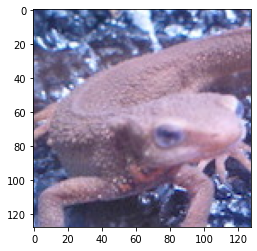

In [2]:
img = cv2.imread("../imori.jpg")
H, W, ch = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
scale = 1.5
H_big, W_big = int(H * scale), int(W * scale)
output_img = np.zeros((H_big, W_big, ch))

def h(t):
    a = -1
    if abs(t) <= 1:
        return (a+2)*(abs(t)**3) - (a+3)*(abs(t)**2) + 1
    elif abs(t) <= 2:
        return a*(abs(t)**3) - 5*a*(abs(t)**2) + 8*a*abs(t) - 4*a
    else:
        return 0

for i in range(H_big):
    for j in range(W_big):
        x = min(int(i/scale), H-1)
        y = min(int(j/scale), W-1)
        
        xs, ys = i/scale, j/scale
        dx = [abs(xs-x+1), abs(xs-x), abs(xs-x-1), abs(xs-x-2)]
        dy = [abs(ys-y+1), abs(ys-y), abs(ys-y-1), abs(ys-y-2)]
        dx = [h(e) for e in dx]
        dy = [h(e) for e in dy]
        
        p = 1.0 / sum([d1*d2 for d1 in dx for d2 in dy])
        q = sum([img[np.clip(x+k-1, 0, H-1), np.clip(y+l-1, 0, W-1), :] * dx[k] * dy[l] for k in range(4) for l in range(4)])
        output_img[i, j, :] = p*q

output_img = np.clip(output_img, 0, 255).astype("uint8")

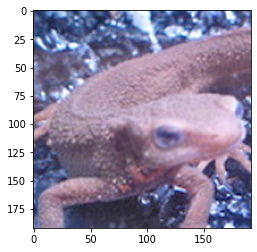

192 192 vs 128 128


In [4]:
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.show()

print(H_big, W_big, "vs", H, W)